In [1]:
%matplotlib inline
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import camb as camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.3 installed at /home/jovyan/.local/lib/python3.7/site-packages/camb


In [3]:
import classy as classy
from classy import Class
print('Using CLASS %s installed at %s'%(classy.__version__,os.path.dirname(classy.__file__)))

Using CLASS v2.9.3 installed at /opt/conda/lib/python3.7/site-packages


In [4]:
from ipywidgets.widgets import *

In [5]:
import sympy
from sympy import cos, simplify, sin, sinh, tensorcontraction
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, RicciScalar
sympy.init_printing()

In [6]:
from IPython.display import Markdown, display

In [7]:
def printmd(string, color='black', math=False, fmt='header2'):
    if math==True:
        mstring = string
    elif math==False:
        mstring="\\textrm{"+string+"}"
    #colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    fmtstr = "${\\color{"+color+"}{"+mstring+"}}$"
    
    if fmt=='header2':
        fmtstr="## "+fmtstr
    if fmt=='header1':
        fmtstr="# "+fmtstr
    display(Markdown(fmtstr))
    return None

# Cosmology

# The Einstein part of the Einstein-Boltzmann codes

Einstein-Boltzmann codes solve essentially the Boltzmann equation in a space-time that is given by Einstein's field equations of General Relativity.

We will see more about the Boltzmann equation in the next section, which is just an equation that describes the phase-space evolution (position and momenta) of particles.

On the other hand, General Relativty describes the interaction between the geometry of spacetime and the
energy-momentum of matter.

$$ \large
\begin{align}\label{eq:Einstein-field-equations}
G_{\mu \nu} +  \Lambda g_{\mu \nu} = 8 \pi G T_{\mu \nu} 
\end{align}
$$

Einstein's field equations are basically a set of coupled partial differential equations of components of the metric $ \large g_{\mu \nu}$. The metric defines the geometry of the space-time manifold.

On the left hand side we have the Einstein tensor $ G_{\mu \nu} \equiv R_{\mu \nu} - \frac{1}{2}g_{\mu \nu} R $ , where the Riemann tensor and Ricci scalar are complicated functions of the metric and its derivatives.
Besides, we have $\Lambda$, which is a free constant parameter allowed by the theory, but which we now think is responsible for the accelerated expansion of the Universe.

The right hand side, with the tensor $ T_{\mu \nu} $ describes the energy and momentum of matter, a fluid, particles or the object in question (for example a star).

## General Relativity in 5min with EinsteinPy

Let's calculate the behavior of the "scale factor" of the Universe, that the Einstein equations predict, for a homogeneous and isotropic Universe filled with a perfect fluid.

In [72]:
G_00, T_00, G, rho = sympy.symbols("G_{00} T_{00} G \\rho")

The 00-component of the Einstein tensor:

In [73]:
einst_eq = sympy.Eq( G_00, 8 * sympy.pi * G * T_00 )
einst_eq

The energy-momentum tensor of a perfect fluid:

In [75]:
energy_momentum = sympy.Eq(T_00, rho)
energy_momentum

In [76]:
syms = sympy.symbols("t x y z")
t, x, y, z = syms

In [77]:
a = sympy.Function("a")  ##scale factor

The line element of a homogeneous and isotropic Universe with no curvature. The metric elements are the coefficients in front of the coordinates.

$$
\begin{align}
ds^2 & = g_{\mu \nu} dx^\mu dx^\nu = -dt^2 + a^2 (t) (dx^2 + dy^2 + dz^2)  
\end{align}
$$

In [80]:
m = sympy.diag(-1, a(t)**2, a(t)**2, a(t)** 2).tolist()
metric = MetricTensor(m, syms)

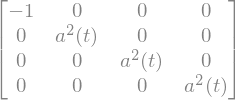

In [81]:
metric.tensor()

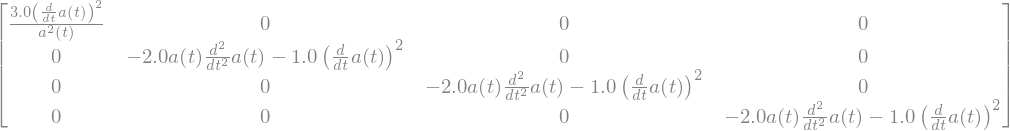

In [82]:
einst = EinsteinTensor.from_metric(metric)
einst.simplify()

In [16]:
H = sympy.symbols("H")

Let's define a new function, that we will cull the **Hubble** function and it will be the relative "velocity" of expansion of $a(t)$:

$$ \large
\begin{align}
H(t) & = \frac{\dot a }{ a} \\
\end{align}
$$

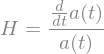

In [67]:
sympy.Eq( H, sympy.Derivative(a(t), t)/a(t) )

In [68]:
G_00s = einst[0,0]
G_00s = G_00s.subs(sympy.Derivative(a(t), t)/a(t), H)
G_00s

In [69]:
einst_eq.subs(G_00, G_00s).subs(T_00, rho)

If we now define $\rho_{cr} \equiv 3 H^2_0/8 \pi G$, so that when dividing both sides by $H_0$ we get the famous Hubble equation:

$$ \large
\begin{align}
H^2(t) & = H^2_0 \frac{\rho(t) }{ \rho_{cr}} \\
\end{align}
$$

If the Universe is composed of multiple species, like baryons, cold dark matter, radiation and so on, then 
$\rho$ is a sum over all those components and we can define the energy density fractions $\Omega$ as:

$$ \large
\begin{align}
\Omega_i(t) & = \frac{\rho(t) }{ \rho_{cr}} \\
\end{align}
$$

Which simplifies the so-called Hubble equation to:
$$ \large
\begin{align}
H^2(t) & = H^2_0 \sum_i{\Omega_i(t)}
\end{align}
$$

Due to the expansion of the Universe, there is a relation between the scale factor defined above $a$ and the redshift $z$, which measures the shift in the wavelengths of the light we receive from galaxies far away: 
$$ \large a = \frac{1}{1+z} $$

## The Cosmic Pie

Precision Cosmology deals with the determination of the cosmological parameters and the components of the Universe at a very high **precision**, using many combinations of experiments and independent observables at different scales and redshifts. Nowadays, we have determined the cosmological parameters with a precision of a few percent or better, thanks to experiments like [Planck](https://sci.esa.int/web/planck/-/60499-from-an-almost-perfect-universe-to-the-best-of-both-worlds).

<a> <img align="center" width="600" src="https://sci.esa.int/documents/34222/35279/1567217424471-Planck_Cosmic-recipe-pie-chart_625.jpg" alt="Cosmic Pie"></a>

If we know the energy and matter components of the Universe today:
   * Cold Dark Matter density $\Omega_c$,  which decays like $a^{-3}$
   * Baryonic (normal) matter density $\Omega_b$, which decays like $a^{-3}$
   * Radiation density $\Omega_r$, which decays like $a^{-4}$
   * The Cosmological Constant density $\Omega_{\Lambda}$, which does not decay because it's a constant.
   
Then we can write down the Hubble function as:

$$ \large H(z) = H_0  \sqrt{(\Omega_c(1+z)^3 + \Omega_b(1+z)^3 + \Omega_r(1+z)^4 + \Omega_{\Lambda}}$$

$H_0$ is the Hubble parameter today and represents the rate of expansion of the Universe at $z=0$ and it is measured in **km/s/Mpc**. Its value can be inferred in many ways, from the Cosmic Microwave Background, from Gravitational Lensing or by measuring the distance to Supernovae. Currently it is a <a href="https://astrobites.org/2019/07/12/h0ly-cow-a-new-measurement-of-the-hubble-constant/" target="_blank" >hot topic</a> in cosmology, since there are *strong tensions* in measurements from different probes.
A value of $70$ km/s/Mpc, means that a galaxy at a distance of $1$Mpc from us, recedes away from us at a speed of $70$km/s.

## Parameters from Planck 2018

From the [2018 Cosmological parameters](https://arxiv.org/abs/1807.06209) paper, Table 1, first column.

Let's create a Planck 2018 parameters dictionary:

In [20]:
planck_18 = dict()

In [21]:
planck_18['ombh2'] = 0.02238   ## Omega_b * h**2
planck_18['omch2'] = 0.12011  ## Omega_c * h**2
planck_18['ln1010As'] = 3.0448  ## ln(10**10 * As), scalar amplitude
planck_18['ns'] = 0.96605       ## spectral index
planck_18['ommh2'] = 0.14314    ##   Omega_m * h**2   , total matter
planck_18['H0'] = 67.32   ##   H0 = 100h
planck_18['sigma8'] = 0.8120    ## amplitude of density fluctuations
planck_18['tau'] = 0.0543      ## Optical depth
planck_18['age_Gyr'] = 13.7971   ## Age of the Universe

And let's compute some "derived" parameters:

In [22]:
planck_18['h'] = planck_18['H0']/100
planck_18['Om'] = planck_18['ommh2']/planck_18['h']**2
planck_18['Ob'] = planck_18['ombh2']/planck_18['h']**2
planck_18['Oc'] = planck_18['omch2']/planck_18['h']**2
planck_18['As'] = np.exp(planck_18['ln1010As'])/np.power(10,10)    ## As, scalar amplitude

In [23]:
planck_18['As']

In [24]:
planck_18['Or'] = 0.0000930479 
## Omega_radiation, more difficult to obtain since it depends on CMB Temperature and number of relativistic species

In a flat Universe, where the total density equals the critical density (defined above) the sum of all the energy density fractions should be 1, therefore the $\Omega_{\Lambda}$ dark energy parameter, is simply whatever it's left:
  $$ \Omega_{\Lambda}   = 1 - \Omega_c - \Omega_b - \Omega_r $$

Let's see what we get for **Planck**:

In [25]:
planck_18['Ol'] = 1-np.array([planck_18[oo] for oo in ['Oc','Ob','Or']]).sum()  ## Ol = Omega_Lambda
planck_18['Ol']

## Let's code our own Hubble function

First, let's code the relation between scale factor and redshift.

In [26]:
def a_of_z(z):
    a=1/(1+z)
    return a 

In [28]:
def Omega_L(Omega_c, Omega_b, Omega_r):
    """
    Function for Omega_Lambda, dark energy.
    
    For a flat Universe:
        Omega_Lambda = 1-Omega_c-Omega_b-Omega_r 
    
    """
    oL = 1 - Omega_c - Omega_b - Omega_r
    return oL

In [31]:
def cosmological_parameters(cosmo_pars=dict()):
    H0 = cosmo_pars.get('H0', planck_18['H0'])  # Planck 2018 cosmological parameters as default
    Oc = cosmo_pars.get('Oc', planck_18['Oc'])
    Ob = cosmo_pars.get('Ob', planck_18['Ob'])
    Or = cosmo_pars.get('Or', planck_18['Or'])
    Om = Ob+Oc
    OL = Omega_L(Oc, Ob, Or)
    return H0, Oc, Ob, Or, Om, OL

Let's test it for the default parameters:

In [33]:
cosmological_parameters()

Let's change $H_0$ to the value obtained by local Universe measurements

In [35]:
local_H0 = {'H0':72}
cosmological_parameters(local_H0)

Let's finally code the Hubble function

In [36]:
def Hubble(z, cosmo_pars=dict()):
    H0, Oc, Ob, Or, Om, OL = cosmological_parameters(cosmo_pars)
    H = H0 * np.sqrt(Om*(1+z)**3 + Or*(1+z)**4 + OL)
    return H

Evaluating at redshift 0 brings nothing surprising:

In [45]:
Hubble(0.)

In [46]:
Hubble(0., local_H0)

In [47]:
crazy_cosmo = {'H0': 75, 
          'Oc':0.40,
          'Ob':0.06, 
           'Or':0.005}

At higher redshifts, the differences becomes larger

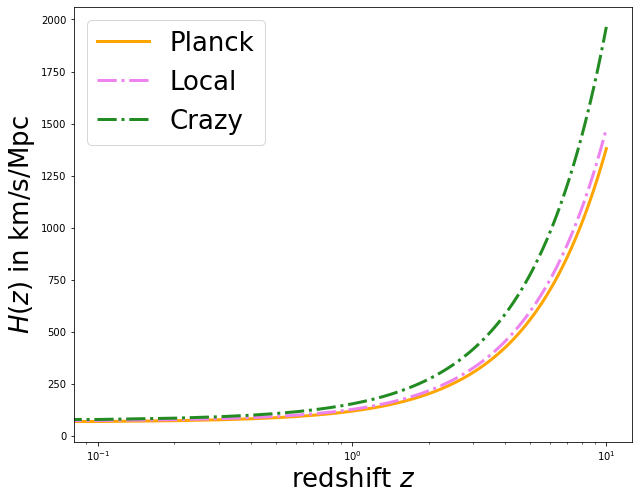

In [123]:
z_arr = np.linspace(0.,10, 100)
fig, ax = plt.subplots(1, 1, sharey='row', sharex='col', figsize=(10,8))  #all plots in the same row, share the y-axis.

# once you specify an axis, it is in this instance where plots are performed
ax.semilogx(z_arr, Hubble(z_arr), '-', label='Planck', color='orange', lw=3)  
ax.semilogx(z_arr, Hubble(z_arr, local_H0), '-.', label='Local', color='violet', lw=3)
ax.semilogx(z_arr, Hubble(z_arr, crazy_cosmo), '-.', label='Crazy', color='forestgreen', lw=3)
ax.legend(fontsize=26)
ax.set_xlabel('redshift $z$', fontsize=26)   
ax.set_ylabel(r'$H(z)$ in km/s/Mpc', fontsize=26);

### Theoretical Question 1:

If $H(z) \approx C$ , with $C$ being a constant today and $H(t)  = {\dot a }/{ a} $, what does that mean for the expansion behavior of the Universe?

# Calculating the Background Cosmology with CAMB and CLASS

# CAMB

CAMB (https://camb.info/) is a code which has been developed for many years by Anthony Lewis and collaborators.
It has been used extensively for the data analysis of Planck.

Its main source is written in `Fortran` and it was used like that for many years by many cosmologists, but the recently added python wrapper brings much more user-friendliness. 
Check here the documentation [CAMB Python](https://camb.readthedocs.io/en/latest/index.html)
And [here](https://camb.info/doc/classes/_index.html) the tree structure of the underlying code.

In [84]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=planck_18['H0'], ombh2=planck_18['ombh2'], omch2=planck_18['omch2']);

In [89]:
## If we evaluate pars, it shows us all the parameters that have been set to their default values.
## print(pars)

Let's calculate the results for those parameters

In [96]:
results = camb.get_results(pars)
results.calc_background(pars)

We can get a dictionary of derived parameters

In [101]:
results.get_derived_params()

{'age': 13.797465544894264,
 'zstar': 1089.913527354714,
 'rstar': 144.39807261487093,
 'thetastar': 1.0411035302987333,
 'DAstar': 13.869713089286854,
 'zdrag': 1059.9673057843763,
 'rdrag': 147.05389004660253,
 'kd': 0.1409146903853102,
 'thetad': 0.16074079969674418,
 'zeq': 3405.0735943489863,
 'keq': 0.01039262329030193,
 'thetaeq': 0.8128008522486668,
 'thetarseq': 0.4491324452306274}

Does it match the age we defined above for Planck18?

In [106]:
(results.get_derived_params()['age'] - planck_18['age_Gyr'])*1000

The difference is 'only' 0.36 million years, which is quite good, considering we left many parameters defined by default.

### Exercise 1:  What would be the age of the Universe in our crazy cosmology?

Check other attributes and methods of `results` in the [documentation](https://camb.readthedocs.io/en/latest/results.html#)

#### The Hubble function is obtained by evaluating:

In [112]:
results.hubble_parameter(0.)

Let's compare against our home-made $H(z)$

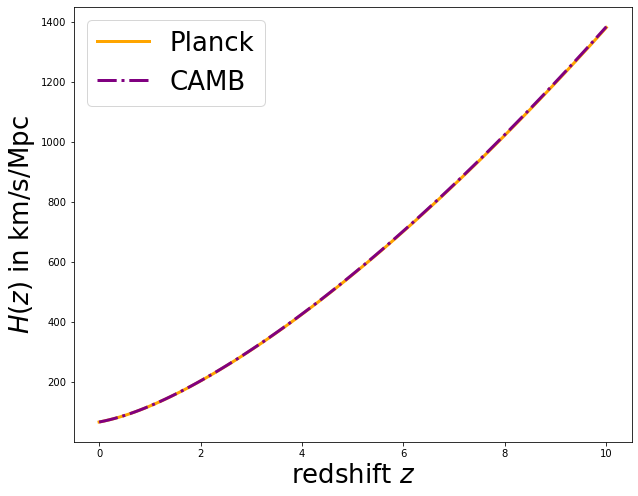

In [122]:
z_arr = np.linspace(0.,10, 100)
fig, ax = plt.subplots(1, 1, sharey='row', sharex='col', figsize=(10,8))  #all plots in the same row, share the y-axis.

# once you specify an axis, it is in this instance where plots are performed
ax.plot(z_arr, Hubble(z_arr), '-', label='Planck', color='orange', lw=3)  
ax.plot(z_arr, results.hubble_parameter(z_arr), '-.', label='CAMB', color='purple', lw=3)
ax.legend(fontsize=26)
ax.set_xlabel('redshift $z$', fontsize=26)   
ax.set_ylabel(r'$H(z)$ in km/s/Mpc', fontsize=26);

Perfect agreement!
Notice that in lin-lin space, the flatness of $H(z)$ for z tending to 0 is not so visible.

# CLASS

[CLASS](https://lesgourg.github.io/class_public/class.html) is a more modern code, compared to CAMB, written by Julien Lesgourges and collaborators in `C` language for performance reasons.
It has been also used extensively for the data analysis of many galaxy surveys.
Check here the [documentation](https://lesgourg.github.io/class_public/class_public-2.9.0/doc/manual/html/index.html), the [Github repo](https://github.com/lesgourg/class_public) and
many [hours of courses and learning material](https://lesgourg.github.io/courses.html).

In [125]:
# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'h': 0.6711,
    'omega_b': 0.022068,
    'omega_cdm': 0.12029}

# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)

cosmo.compute()


In [126]:
# Print on screen to see the output
#print(cls)
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

# plot something with matplotlib...

# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
cosmo.struct_cleanup()

# If you want to change completely the cosmology, you should also
# clean the arguments, otherwise, if you are simply running on a loop
# of different values for the same parameters, this step is not needed
cosmo.empty()

# Answer to exercises

## Exercise 1:

In [ ]:
pars_2 = camb.CAMBparams()
pars_2.set_cosmology(H0=crazy_cosmo['H0'], ombh2=crazy_cosmo['Ob']*(crazy_cosmo['H0']/100)**2, 
                   omch2=crazy_cosmo['Oc']*(crazy_cosmo['H0']/100)**2);

results_2 = camb.get_results(pars_2)
results_2.calc_background(pars_2)
results_2.get_derived_params()['age']